# PART 1 EXPLORING DATASET#

In [1]:
# IMPORT libraries and packages

In [3]:
from scipy.stats import skew, kurtosis
import scipy.stats as stats
import sqlite3
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn')

In [4]:
np.random.seed(0)

In [5]:
conn= sqlite3.connect('database.sqlite')
c= conn.cursor()

In [6]:
def create_dFrame(string):
    '''
    Input:
    Output:
    '''
    c.execute(string)
    dFrame = pd.DataFrame(c.fetchall())
    dFrame.columns = [x[0] for x in c.description]
    return dFrame

In [7]:
query_overall= ''' select score from reviews'''
dFrame_all= create_dFrame(query_overall)
dFrame_all.describe()

,score
count,18393.000000
mean,7.005779
std,1.293675
min,0.000000
25%,6.400000
50%,7.200000
75%,7.800000
max,10.000000


In [6]:
#dFrame_all.loc[dFrame_all['score'] < 6.4].count()

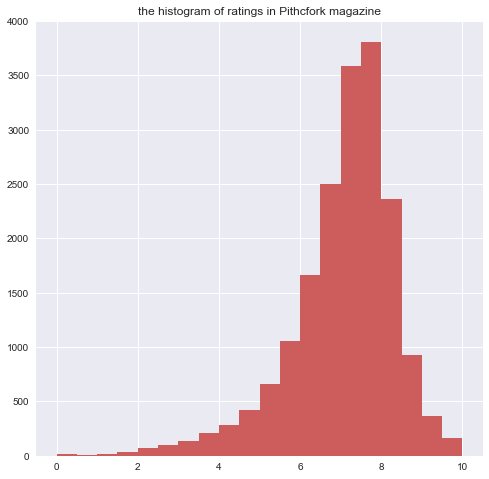

In [51]:
plt.figure(figsize=(8, 8))
plt.hist(dFrame_all.score, bins= 20, color='indianred')
plt.title('the histogram of ratings in Pithcfork magazine')
plt.savefig('overview.png')
plt.show();

In [53]:
#sm.qqplot(dFrame_all.score, line='s')

Kolmogorov-Smirnov test for normal distribution:

In [9]:
print(stats.kstest(dFrame_all.score, 'norm', args=(7.031, 1.148)))

KstestResult(statistic=0.0996237365460188, pvalue=5.51358199733418e-159)


In [10]:
print(f'skewness: {round(skew(dFrame_all.score), 4)}')
print(f'kurtosis: {round(kurtosis(dFrame_all.score), 4)}')

skewness: -1.2338
kurtosis: 2.7346


In [11]:
k2, p= stats.normaltest(dFrame_all.score)
alpha = .05
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0
The null hypothesis can be rejected


***
## PART 2 SAMPLING / CLT ##

In [12]:
print(type(dFrame1))
print(len(dFrame1))

NameError: name 'dFrame1' is not defined

In [203]:
dFrame1.score.mean()

7.00577937258735

In [175]:
sample1= dFrame1.sample(n=500, random_state= 0)
sample1.score.mean()

6.9972

In [176]:
error= np.abs(sample1.score.mean() - dFrame1.score.mean())
print(f'error: {round(error,4)}')
per_error= error/dFrame1.score.mean()*100
print(f'percent of error: {round(per_error, 4)}')

error: 0.0086
percent of error: 0.1225


In [177]:
sample_means = []
for i in range(10**4):
    sample = dFrame1.sample(n=500, random_state=i) #Take a sample of 50 people
    sample_means.append(sample.score.mean()) #Calculate the sample mean

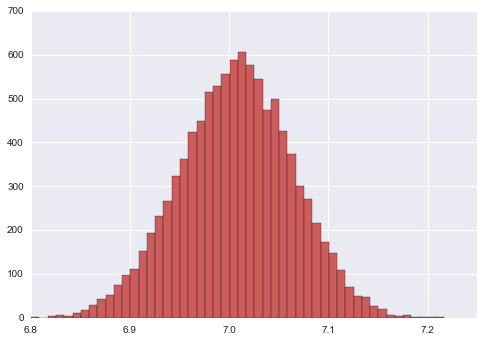

In [183]:
plt.hist(sample_means, bins= 50, color='indianred')
plt.show()

In [181]:
population_mean = dFrame1.score.mean()
mean_sample_means = np.mean(sample_means)
acc = 1 - (np.abs(mean_sample_means - population_mean) / population_mean)
print(acc)

0.9998196792468808


In [13]:
def get_sample(data, n):
    '''
    Input:
    Output:
    '''
    sample= []
    while len(sample) != n:
        a= np.random.choice(data)
        sample.append(a)
    return sample

In [14]:
def get_sample_mean(sample):
    '''
    Input:
    Output:
    '''
    return sum(sample)/len(sample)

In [15]:
def create_sample_distribution(data, dist_size= 100, n=30):
    '''
    Input: dataset, size of disctribution, size of sample
    Output:
    '''
    sample_distribution= []
    while len(sample_distribution) != dist_size:
        sample = get_sample(data, n)
        sample_mean = get_sample_mean(sample)
        sample_distribution.append(sample_mean)
    return sample_distribution

In [16]:
test= create_sample_distribution(dFrame_all.score, 300, 30)

In [17]:
print(f'mean of all means: {round(sum(test)/len(test), 4)}')

mean of all means: 7.0266


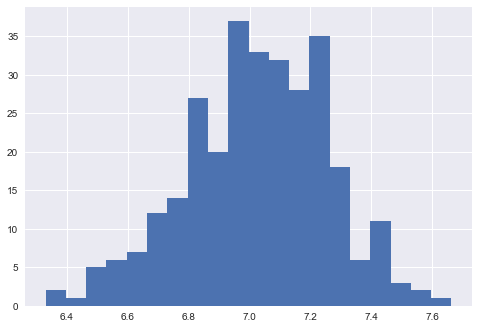

In [18]:
plt.hist(test, bins= 20);

***
## PART 3 TESTING ##
***

**QUESTION 1: Is there a difference between the ratings of ROCK music and all other music?**

**ONE-SAMPLE T TEST**

Goal: Test, at 5% level of significance, whether are there differences in magazine's ratings with respect to genes. In particular test, is rock genre treated the same as other music genres

H0= there is no significant difference in ratings of rock music comparing to others

HA= the ratings of rock music are usually lower than ratings of all genres

In [61]:
# GET rock sample
query_rock= ''' select score, genre from reviews join genres using (reviewid) where genre == 'rock' '''
dFrame_rock= create_dFrame(query_rock)
print(f'mean of ratings of ROCK: {round(dFrame_rock.score.mean(), 4)}')

mean of ratings of ROCK: 6.942


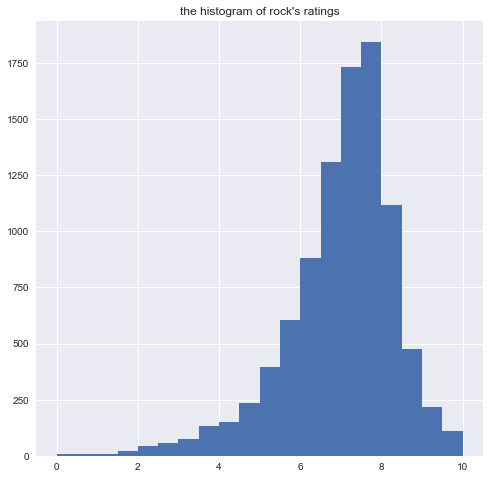

In [64]:
plt.figure(figsize= (8,8))
plt.hist(dFrame_rock.score, bins= 20)
plt.title('the histogram of rock\'s ratings')
plt.savefig('rock_ratings.png')
plt.show()

mean of all rock means: 6.9658


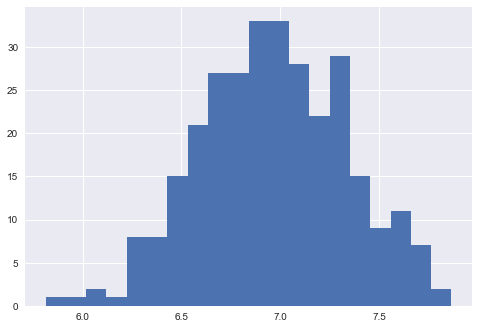

In [20]:
test_rock= create_sample_distribution(dFrame_rock.score, 300, 15)
print(f'mean of all rock means: {round(sum(test_rock)/len(test_rock), 4)}')
plt.hist(test_rock, bins= 20);

the population mean = sum of all ratings / number of data points
the sample mean = sum of all  rock ratings / number of data points
the sample standard deviation
number of observation = number of data points
degrees of freedom

In [66]:
#np.std(dFrame_rock.score)

In [65]:
#(dFrame_rock.score.mean() - dFrame_all.score.mean())/(np.std(dFrame_rock.score)/np.sqrt(len(dFrame_rock.score)))

In [67]:
t_crit = np.round(stats.t.ppf(1 - 0.95, df=299),3)
t_crit

-1.65

Calculate t statistic as:

**$\frac{\hat{x} - \mu}{\sigma/\sqrt{n}}$**

In [60]:
x_hat= sum(test_rock)/len(test_rock)
mu= sum(test)/len(test)
sigma= np.std(test_rock)
n_sqrt= np.sqrt(len(test_rock))
print(f't statistics for ratings of rock music: {round((x_hat-mu)/(sigma/n_sqrt), 3)}')

t statistics for ratings of rock music: -2.815


Conclusion:
Because t-statistics is less than t-critical, i.e. is located to the left of t-critical value with alpha = 0.05, we reject the null hypothesis and can conclude that rock music in general rated lower. 

QUESTION 2:
Is there a statistical difference between the ratings of two different music genres

TWO SAMPLE T TEST

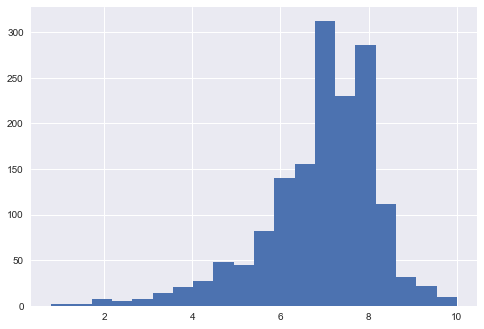

In [26]:
query_rap= '''select score, genre from reviews join genres using (reviewid) where genre == 'rap' '''
dFrame_rap= create_dFrame(query_rap)
plt.hist(dFrame_rap.score, bins= 20);

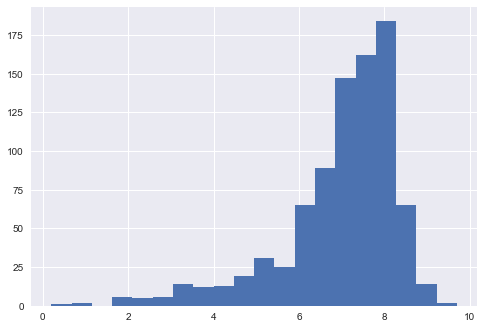

In [27]:
query_metal= '''select score, genre from reviews join genres using (reviewid) where genre == 'metal' '''
dFrame_metal= create_dFrame(query_metal)
plt.hist(dFrame_metal.score, bins= 20);

In [28]:
print(dFrame_rap.info())
print()
print(dFrame_metal.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 2 columns):
score    1559 non-null float64
genre    1559 non-null object
dtypes: float64(1), object(1)
memory usage: 24.4+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 2 columns):
score    862 non-null float64
genre    862 non-null object
dtypes: float64(1), object(1)
memory usage: 13.5+ KB
None


mean of all rap means: 6.8788
KstestResult(statistic=0.0401040457767915, pvalue=0.7201678002327183)


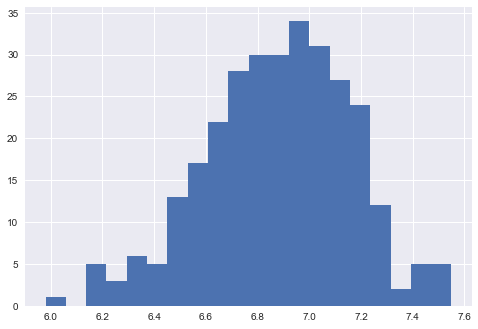

In [29]:
test_rap= create_sample_distribution(dFrame_rap.score, 300, 20)
print(f'mean of all rap means: {round(sum(test_rap)/len(test_rap), 4)}')
test_rap_array= np.array(test_rap)
print(stats.kstest(test_rap_array, 'norm', args=(test_rap_array.mean(), test_rap_array.std())))
plt.hist(test_rap, bins= 20);

mean of all metal means: 6.9567
KstestResult(statistic=0.04396028083932885, pvalue=0.6093832883902056)


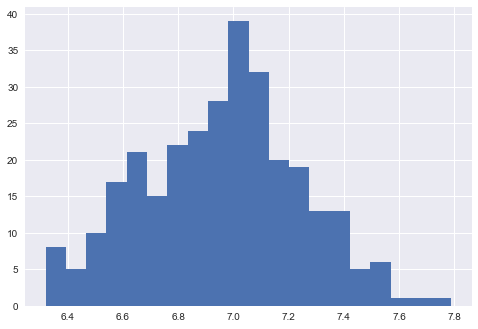

In [30]:
test_metal= create_sample_distribution(dFrame_metal.score, 300, 20)
print(f'mean of all metal means: {round(sum(test_metal)/len(test_metal), 4)}')
test_metal_array= np.array(test_metal)
print(stats.kstest(test_metal_array, 'norm', args=(test_metal_array.mean(), test_metal_array.std())))
plt.hist(test_metal, bins= 20);

In [31]:
stats.ttest_ind(test_rap, test_metal)

Ttest_indResult(statistic=-3.356802897326383, pvalue=0.0008385236969770095)

There is a significant difference how rap and metal are rated

***
## TEST_#_ ##

Goodness-of-fit $\chi^2$ test to check sample whether it fits a particular population well

Goal: Test, at 5 % level of significance, whether there is a sufficient evidence in the sample to conclude that the distribution of genres reviewed in magazine in the last 2 years had changed from previous years

$\chi^2$ = $\Sigma\frac{(OBSERVED - ESTIMATED)^2}{ESTIMATED}$

Hypothesis:
- H0 = distribution of genres in the last two years __has not__ changed
- HA = distribution of genres __has__ changed

$\chi^2_{.05}$ with df -> 8 equals 15.507, so rejection region: [15.507, $\infty$)

In [32]:
query_chi= ('''select pub_year, genre from reviews join genres using(reviewid)''')
dFrame_chitest= create_dFrame(query_chi)
dFrame_chitest.isnull().sum()

pub_year       0
genre       2371
dtype: int64

In [33]:
dFrame_chitest.dropna(inplace= True)

In [34]:
dFrame_chitest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20319 entries, 0 to 22688
Data columns (total 2 columns):
pub_year    20319 non-null int64
genre       20319 non-null object
dtypes: int64(1), object(1)
memory usage: 476.2+ KB


In [35]:
def split_dFrame (data, year):
    dFrame1= data[data['pub_year'] < year]
    dFrame2= data[data['pub_year'] >= year]
    return dFrame1, dFrame2

In [36]:
dFrame_prior2015, dFrame_post2015 = split_dFrame(dFrame_chitest, 2015)

In [37]:
dFrame_prior2015.groupby('genre').count()

,pub_year
genre,
electronic,3417
experimental,1602
folk/country,591
global,184
jazz,380
metal,747
pop/r&b,1185
rap,1202
rock,8566


In [38]:
dFrame_post2015.groupby('genre').count()

,pub_year
genre,
electronic,457
experimental,213
folk/country,94
global,35
jazz,55
metal,115
pop/r&b,247
rap,357
rock,872


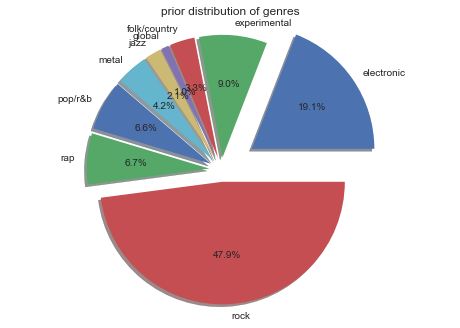

In [42]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = dFrame_prior2015.groupby('genre').count().index.tolist()
sizes = prior_distrib(dFrame_prior2015)
explode = (0.3, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode= explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('prior distribution of genres')
plt.savefig('chi_test_prior.png')

plt.show()

In [41]:
def prior_distrib (data):
    l= []
    for i in range(len(data.groupby('genre').count())):
        l.append(data.groupby('genre').count()['pub_year'][i]/len(data))
    return np.array(l)

In [43]:
prior_distrib(dFrame_prior2015)

array([0.19117153, 0.08962739, 0.03306479, 0.01029428, 0.02125993,
       0.04179255, 0.06629742, 0.06724852, 0.47924359])

In [44]:
def observed_distrib (data):
    l= []
    for i in range(len(data.groupby('genre').count())):
        l.append(data.groupby('genre').count()['pub_year'][i])
    return np.array(l)

In [45]:
observed_distrib(dFrame_post2015)

array([457, 213,  94,  35,  55, 115, 247, 357, 872])

In [46]:
def estimated_distrib (data, prior_data):
    l= (len(data)*prior_distrib(prior_data))
  
    return np.rint(l)

In [55]:
estimated_distrib(dFrame_post2015, dFrame_prior2015)


array([ 467.,  219.,   81.,   25.,   52.,  102.,  162.,  164., 1172.])

In [47]:
def test_statistic (data, prior_data):
    nom= (observed_distrib(data) - estimated_distrib(data, prior_data))**2
    denom= estimated_distrib(data, prior_data)
    return sum(nom/denom)

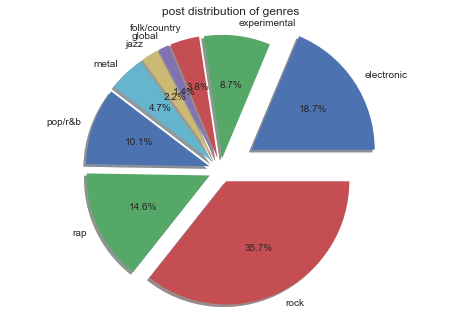

In [48]:
labels = dFrame_post2015.groupby('genre').count().index.tolist()
sizes = prior_distrib(dFrame_post2015)
explode = (0.3, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

#plt.figure(figsize=(8, 8), dpi= 150)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode= explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('post distribution of genres')
plt.savefig('chi_test_post.png')

plt.show()

In [49]:
print(f' Because chi-squared test {round(test_statistic(dFrame_post2015, dFrame_prior2015), 3)} is located in rejection \
region, we reject Null-hypothesis')

 Because chi-squared test 356.813 is located in rejection region, we reject Null-hypothesis


**Conclusion:**

Based on test results, we conclude that with 5% level of confidence there is a suficient evidence of changig in distribution of genres reviewed in that magazine in the last two years